<a href="https://colab.research.google.com/github/preetamkamal/RedditWave/blob/main/Redditwave_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from datetime import datetime
from datetime import timezone

In [125]:
from pprint import pprint
from itertools import chain


# sentiment analysis
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize, RegexpTokenizer # tokenize words
from nltk.corpus import stopwords
nltk.download('vader_lexicon')

from datetime import timedelta

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [126]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn import svm
import numpy as np
import pandas as pd

from numpy import loadtxt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [127]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [128]:
!pip install emoji

In [19]:
!pip install praw # Python Reddit API Wrapper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 1.6 MB/s eta 0:00:00


In [20]:
!pip install -q transformers

In [21]:
import praw
import pandas as pd
import datetime
import emoji
from nltk.tokenize import RegexpTokenizer
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import nltk
from datetime import datetime

In [22]:
reddit = praw.Reddit(
    client_id="w0ntl85A-dWMz4CFgHQ_Vg",
    client_secret="TPsZJMIR0eeroXnKOq9IJlrqzPOkwQ",
    user_agent="SMDM_proj",
)

In [23]:
reddit.read_only = True

In [24]:
hot_posts=reddit.subreddit("ethereum").top(limit=1000)

In [25]:

# Replace 'subreddit_name' with the actual subreddit you're interested in
subreddit = reddit.subreddit('ethereum')

# Get the hot posts from the subreddit
hot_posts = subreddit.hot(limit=1000)  # Adjust the limit as needed
#posts_df = pd.DataFrame(posts, columns=['id', 'author', 'created_datetime_utc','created_utc', 'domain', 'url', 'title', 'num_comments', 'score', 'upvote_ratio'])
# Initialize an empty list to store post data
posts = []

# Cycle through all of the top-level posts the generator can provide
for post in hot_posts:
    # Convert the UTC timestamp to a datetime object
    created_datetime_utc = datetime.utcfromtimestamp(post.created_utc).replace(tzinfo=timezone.utc)
 # Format datetime into separate date and time strings
    datetime_str = created_datetime_utc.strftime('%Y-%m-%d %H:%M:%S')
    date_str = created_datetime_utc.strftime('%Y-%m-%d')
    # Append post data to the list
    posts.append([
        post.id,
        post.author,
        int( post.created_utc) ,
        post.domain,
        post.url,
        post.title,
        post.num_comments,
        post.score,
        post.upvote_ratio,
        datetime_str,
        date_str,
    ])
posts = pd.DataFrame(posts, columns=['ID', 'Author', 'Created UTC', 'Domain', 'URL', 'Title', 'Num Comments', 'Score', 'Upvote Ratio', 'datetime','date'])

posts

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

,ID,Author,Created UTC,Domain,URL,Title,Num Comments,Score,Upvote Ratio,datetime,date
0,18hqu1z,abcoathup,1702500664,notes.ethereum.org,https://notes.ethereum.org/@vbuterin/enshrined...,"Vitalik: What might an ""enshrined ZK-EVM"" look...",1,16,0.90,2023-12-13 20:51:04,2023-12-13
1,18ie0ja,supermeefer,1702575534,self.ethereum,https://www.reddit.com/r/ethereum/comments/18i...,"Lost All my Eth, and I think I know who stole it",54,28,0.68,2023-12-14 17:38:54,2023-12-14
2,18ib69r,FlexpoolTechnologies,1702567873,self.ethereum,https://www.reddit.com/r/ethereum/comments/18i...,Ledger connect supply chain attack,7,33,0.90,2023-12-14 15:31:13,2023-12-14
3,18ikw42,patniemeyer,1702593792,self.ethereum,https://www.reddit.com/r/ethereum/comments/18i...,Twin Coding for distributed storage...,1,3,1.00,2023-12-14 22:43:12,2023-12-14
4,18igxib,Friendly_Reach_9748,1702583264,self.ethereum,https://www.reddit.com/r/ethereum/comments/18i...,Ethereum network fees?!?,24,4,0.61,2023-12-14 19:47:44,2023-12-14
...,...,...,...,...,...,...,...,...,...,...,...
411,178sdmq,nishinoran,1697413179,validatorqueue.com,https://www.validatorqueue.com,"After months of multi-week wait times, the Eth...",3,18,0.91,2023-10-15 23:39:39,2023-10-15
412,178z5lh,AutoModerator,1697436034,self.ethereum,https://www.reddit.com/r/ethereum/comments/178...,Frequently Asked Questions + Weekly Discussion...,1,5,1.00,2023-10-16 06:00:34,2023-10-16
413,1797ehw,6uRku2va,1697466850,en.cryptonomist.ch,https://en.cryptonomist.ch/2023/10/16/trust-wa...,Trust Wallet reveals new crypto identity: “own...,2,1,0.56,2023-10-16 14:34:10,2023-10-16
414,179s4eg,tgm0,1697524915,self.ethereum,https://www.reddit.com/r/ethereum/comments/179...,15% fees for ETH staking on Kraken,31,0,0.34,2023-10-17 06:41:55,2023-10-17


In [ ]:
# df_posts = posts

In [26]:
from datetime import timedelta
import csv
timelabel = datetime(2022,1,1)
with open('ethereum'+str(timelabel)+'.csv', mode='a', encoding="utf-8", newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['ID', 'Author', 'Created UTC', 'Domain', 'URL', 'Title', 'Num Comments', 'Score', 'Upvote Ratio'])

        # iterate over the submissions and write the data to the file
        for submission in hot_posts:
            print(submission)
            writer.writerow([submission['author'], submission['created_utc'], submission['domain'], submission['url'], submission['title'], submission['num_comments'], submission['score'], submission['upvote_ratio']])



In [13]:
df_posts = pd.read_csv("final_data.csv")

In [14]:
df_posts.shape

(361384, 10)

In [89]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"kamalpreetam","key":"68082247e9746305136e13278e49d793"}'}

In [28]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [29]:
!kaggle datasets download -d tencars/392-crypto-currency-pairs-at-minute-resolution

100% 1.85G/1.86G [00:19<00:00, 53.5MB/s]
100% 1.86G/1.86G [00:19<00:00, 105MB/s] 


In [30]:
!unzip 392-crypto-currency-pairs-at-minute-resolution.zip

Archive:  392-crypto-currency-pairs-at-minute-resolution.zip
  inflating: 1inch-usd.csv           
  inflating: 1inch-ust.csv           
  inflating: 1inch_usd.csv           
  inflating: 1inch_ust.csv           
  inflating: 1inchusd.csv            
  inflating: 1inchust.csv            
  inflating: aaabbb.csv              
  inflating: aave-usd.csv            
  inflating: aave-ust.csv            
  inflating: aave_usd.csv            
  inflating: aave_ust.csv            
  inflating: aavef0_ustf0.csv        
  inflating: aavef0ustf0.csv         
  inflating: aaveusd.csv             
  inflating: aaveust.csv             
  inflating: adabtc.csv              
  inflating: adaf0-ustf0.csv         
  inflating: adaf0_ustf0.csv         
  inflating: adaf0ustf0.csv          
  inflating: adausd.csv              
  inflating: adaust.csv              
  inflating: aixusd.csv              
  inflating: aixust.csv              
  inflating: albt-usd.csv            
  inflating: albt-ust.csv  

In [92]:
### read the csv file
df = pd.read_csv('ethusd.csv')

In [93]:
df.head(5)
# df.columns

,time,open,close,high,low,volume
0,1457539440000,10.297,10.097,10.297,10.097,0.03
1,1457545740000,11.197,11.197,11.197,11.197,0.01
2,1457549760000,11.097,11.097,11.097,11.097,0.02
3,1457554560000,11.195,11.195,11.195,11.195,0.01
4,1457554860000,10.870,10.870,10.870,10.870,1.00


In [94]:
if "Unnamed: 0" in df.columns:
  df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [95]:
df.loc[:, 'time'] = df['time'].apply(lambda x: datetime.fromtimestamp(x/1000.0).strftime('%Y-%m-%d %H:%M:%S'))
df['time'] = pd.to_datetime(df['time'])

In [96]:
df['Dates'] = pd.to_datetime(df['time']).dt.date
df['Time'] = pd.to_datetime(df['time']).dt.time

In [97]:
df.head(5)

,time,open,close,high,low,volume,Dates,Time
0,2016-03-09 16:04:00,10.297,10.097,10.297,10.097,0.03,2016-03-09,16:04:00
1,2016-03-09 17:49:00,11.197,11.197,11.197,11.197,0.01,2016-03-09,17:49:00
2,2016-03-09 18:56:00,11.097,11.097,11.097,11.097,0.02,2016-03-09,18:56:00
3,2016-03-09 20:16:00,11.195,11.195,11.195,11.195,0.01,2016-03-09,20:16:00
4,2016-03-09 20:21:00,10.870,10.870,10.870,10.870,1.00,2016-03-09,20:21:00


In [98]:
df_posts.head(5)

,Author,Created UTC,Domain,URL,Title,Num Comments,Score,Upvote Ratio,datetime,date,Dates,Time,Time_5,window_5
0,[deleted],2021-01-03 04:01:37,self.ethereum,https://www.reddit.com/r/ethereum/comments/kpd...,Buying $14k worth of ETH tomorrow. Advice.,14,6,0.80,2021-01-03 04:01:37,2021-01-03,2021-01-03,04:01:00,2021-01-03 04:06:37,04:06:00
1,NotReal1234_,2021-01-03 03:16:59,self.ethereum,https://www.reddit.com/r/ethereum/comments/kpc...,What exchanges for ETH options?,0,1,1.00,2021-01-03 03:16:59,2021-01-03,2021-01-03,03:16:00,2021-01-03 03:21:59,03:21:00
2,Seanymac622,2021-01-03 02:53:20,self.ethereum,https://www.reddit.com/r/ethereum/comments/kpc...,Trezor one,0,1,1.00,2021-01-03 02:53:20,2021-01-03,2021-01-03,02:53:00,2021-01-03 02:58:20,02:58:00
3,SmashBerlin,2021-01-03 02:14:03,self.ethereum,https://www.reddit.com/r/ethereum/comments/kpb...,Earn easy eth while watching tv or whatever,0,1,0.66,2021-01-03 02:14:03,2021-01-03,2021-01-03,02:14:00,2021-01-03 02:19:03,02:19:00
4,jamesakillroy,2021-01-03 01:27:35,self.ethereum,https://www.reddit.com/r/ethereum/comments/kpa...,"Just bought $20,000 of ETH.",265,367,0.92,2021-01-03 01:27:35,2021-01-03,2021-01-03,01:27:00,2021-01-03 01:32:35,01:32:00


In [99]:
df_posts.columns

Index(['Author', 'Created UTC', 'Domain', 'URL', 'Title', 'Num Comments',
       'Score', 'Upvote Ratio', 'datetime', 'date', 'Dates', 'Time', 'Time_5',
       'window_5'],
      dtype='object')

In [39]:
if "Unnamed: 0" in df_posts.columns:
  df_posts.drop(['Unnamed: 0'], axis=1, inplace=True)

In [40]:
df_posts['Created UTC'] = df_posts['Created UTC'].apply(lambda x: datetime.fromtimestamp(x))

In [41]:
df_posts['Dates'] = pd.to_datetime(df_posts['Created UTC']).dt.date
df_posts['Time'] = pd.to_datetime(df_posts['Created UTC']).dt.time

In [42]:
df_posts['Time'] = pd.to_datetime(df_posts['Created UTC']).dt.floor('min').dt.time

In [100]:

df_posts.head(5)

,Author,Created UTC,Domain,URL,Title,Num Comments,Score,Upvote Ratio,datetime,date,Dates,Time,Time_5,window_5
0,[deleted],2021-01-03 04:01:37,self.ethereum,https://www.reddit.com/r/ethereum/comments/kpd...,Buying $14k worth of ETH tomorrow. Advice.,14,6,0.80,2021-01-03 04:01:37,2021-01-03,2021-01-03,04:01:00,2021-01-03 04:06:37,04:06:00
1,NotReal1234_,2021-01-03 03:16:59,self.ethereum,https://www.reddit.com/r/ethereum/comments/kpc...,What exchanges for ETH options?,0,1,1.00,2021-01-03 03:16:59,2021-01-03,2021-01-03,03:16:00,2021-01-03 03:21:59,03:21:00
2,Seanymac622,2021-01-03 02:53:20,self.ethereum,https://www.reddit.com/r/ethereum/comments/kpc...,Trezor one,0,1,1.00,2021-01-03 02:53:20,2021-01-03,2021-01-03,02:53:00,2021-01-03 02:58:20,02:58:00
3,SmashBerlin,2021-01-03 02:14:03,self.ethereum,https://www.reddit.com/r/ethereum/comments/kpb...,Earn easy eth while watching tv or whatever,0,1,0.66,2021-01-03 02:14:03,2021-01-03,2021-01-03,02:14:00,2021-01-03 02:19:03,02:19:00
4,jamesakillroy,2021-01-03 01:27:35,self.ethereum,https://www.reddit.com/r/ethereum/comments/kpa...,"Just bought $20,000 of ETH.",265,367,0.92,2021-01-03 01:27:35,2021-01-03,2021-01-03,01:27:00,2021-01-03 01:32:35,01:32:00


In [101]:

df_join = pd.merge(df,df_posts,on=['Dates', 'Time'])
df_join.head(5)

,time,open,close,high,low,volume,Dates,Time,Author,Created UTC,Domain,URL,Title,Num Comments,Score,Upvote Ratio,datetime,date,Time_5,window_5
0,2021-01-02 05:00:00,730.020000,729.75,730.03,729.750000,37.301972,2021-01-02,05:00:00,FrequentMushroom,2021-01-02 05:00:54,self.ethereum,https://www.reddit.com/r/ethereum/comments/kor...,If Ethereum continues to rise dont GAS fees too?,6,0,0.33,2021-01-02 05:00:54,2021-01-02,2021-01-02 05:05:54,05:05:00
1,2021-01-02 05:37:00,732.160000,732.16,732.16,732.160000,0.050000,2021-01-02,05:37:00,emperor-penguin-,2021-01-02 05:37:03,self.ethereum,https://www.reddit.com/r/ethereum/comments/kor...,Any successful guides for Ethereum mining?,3,0,0.44,2021-01-02 05:37:03,2021-01-02,2021-01-02 05:42:03,05:42:00
2,2021-01-02 06:03:00,731.670000,731.57,731.67,731.240000,0.961383,2021-01-02,06:03:00,k_dhokla,2021-01-02 06:03:26,self.ethereum,https://www.reddit.com/r/ethereum/comments/kos...,5 Rinkeby Test Ether (For Learning Purpose Only),0,1,1.00,2021-01-02 06:03:26,2021-01-02,2021-01-02 06:08:26,06:08:00
3,2021-01-02 06:25:00,732.030000,732.02,732.03,732.020000,0.100000,2021-01-02,06:25:00,dak9000,2021-01-02 06:25:20,self.ethereum,https://www.reddit.com/r/ethereum/comments/kos...,How does ERC-20 token adoption impact Ethereum?,2,1,1.00,2021-01-02 06:25:20,2021-01-02,2021-01-02 06:30:20,06:30:00
4,2021-01-02 06:26:00,731.861389,731.95,731.95,731.861389,0.116660,2021-01-02,06:26:00,another_lease,2021-01-02 06:26:09,self.ethereum,https://www.reddit.com/r/ethereum/comments/kos...,Smart Contract to sell a domain name via escrow,1,5,0.86,2021-01-02 06:26:09,2021-01-02,2021-01-02 06:31:09,06:31:00


In [102]:
df_posts.head(5)

,Author,Created UTC,Domain,URL,Title,Num Comments,Score,Upvote Ratio,datetime,date,Dates,Time,Time_5,window_5
0,[deleted],2021-01-03 04:01:37,self.ethereum,https://www.reddit.com/r/ethereum/comments/kpd...,Buying $14k worth of ETH tomorrow. Advice.,14,6,0.80,2021-01-03 04:01:37,2021-01-03,2021-01-03,04:01:00,2021-01-03 04:06:37,04:06:00
1,NotReal1234_,2021-01-03 03:16:59,self.ethereum,https://www.reddit.com/r/ethereum/comments/kpc...,What exchanges for ETH options?,0,1,1.00,2021-01-03 03:16:59,2021-01-03,2021-01-03,03:16:00,2021-01-03 03:21:59,03:21:00
2,Seanymac622,2021-01-03 02:53:20,self.ethereum,https://www.reddit.com/r/ethereum/comments/kpc...,Trezor one,0,1,1.00,2021-01-03 02:53:20,2021-01-03,2021-01-03,02:53:00,2021-01-03 02:58:20,02:58:00
3,SmashBerlin,2021-01-03 02:14:03,self.ethereum,https://www.reddit.com/r/ethereum/comments/kpb...,Earn easy eth while watching tv or whatever,0,1,0.66,2021-01-03 02:14:03,2021-01-03,2021-01-03,02:14:00,2021-01-03 02:19:03,02:19:00
4,jamesakillroy,2021-01-03 01:27:35,self.ethereum,https://www.reddit.com/r/ethereum/comments/kpa...,"Just bought $20,000 of ETH.",265,367,0.92,2021-01-03 01:27:35,2021-01-03,2021-01-03,01:27:00,2021-01-03 01:32:35,01:32:00


In [103]:
df_posts['Time_5'] = df_posts['Created UTC'] + timedelta(minutes=5)

In [104]:
df_posts['window_5'] = pd.to_datetime(df_posts['Time_5']).dt.time

In [105]:
df_posts.head(5)

,Author,Created UTC,Domain,URL,Title,Num Comments,Score,Upvote Ratio,datetime,date,Dates,Time,Time_5,window_5
0,[deleted],2021-01-03 04:01:37,self.ethereum,https://www.reddit.com/r/ethereum/comments/kpd...,Buying $14k worth of ETH tomorrow. Advice.,14,6,0.80,2021-01-03 04:01:37,2021-01-03,2021-01-03,04:01:00,2021-01-03 04:06:37,04:06:37
1,NotReal1234_,2021-01-03 03:16:59,self.ethereum,https://www.reddit.com/r/ethereum/comments/kpc...,What exchanges for ETH options?,0,1,1.00,2021-01-03 03:16:59,2021-01-03,2021-01-03,03:16:00,2021-01-03 03:21:59,03:21:59
2,Seanymac622,2021-01-03 02:53:20,self.ethereum,https://www.reddit.com/r/ethereum/comments/kpc...,Trezor one,0,1,1.00,2021-01-03 02:53:20,2021-01-03,2021-01-03,02:53:00,2021-01-03 02:58:20,02:58:20
3,SmashBerlin,2021-01-03 02:14:03,self.ethereum,https://www.reddit.com/r/ethereum/comments/kpb...,Earn easy eth while watching tv or whatever,0,1,0.66,2021-01-03 02:14:03,2021-01-03,2021-01-03,02:14:00,2021-01-03 02:19:03,02:19:03
4,jamesakillroy,2021-01-03 01:27:35,self.ethereum,https://www.reddit.com/r/ethereum/comments/kpa...,"Just bought $20,000 of ETH.",265,367,0.92,2021-01-03 01:27:35,2021-01-03,2021-01-03,01:27:00,2021-01-03 01:32:35,01:32:35


In [106]:
df.head(5)

,time,open,close,high,low,volume,Dates,Time
0,2016-03-09 16:04:00,10.297,10.097,10.297,10.097,0.03,2016-03-09,16:04:00
1,2016-03-09 17:49:00,11.197,11.197,11.197,11.197,0.01,2016-03-09,17:49:00
2,2016-03-09 18:56:00,11.097,11.097,11.097,11.097,0.02,2016-03-09,18:56:00
3,2016-03-09 20:16:00,11.195,11.195,11.195,11.195,0.01,2016-03-09,20:16:00
4,2016-03-09 20:21:00,10.870,10.870,10.870,10.870,1.00,2016-03-09,20:21:00


In [107]:
df.rename(columns={'Time': 'window_5'}, inplace=True)

In [108]:
df_posts['window_5'] = pd.to_datetime(df_posts['Time_5']).dt.floor('min').dt.time

In [109]:
df_join1 = pd.merge(df,df_posts,on=['Dates', 'window_5'])
df_join1.head(5)

,time,open,close,high,low,volume,Dates,window_5,Author,Created UTC,Domain,URL,Title,Num Comments,Score,Upvote Ratio,datetime,date,Time,Time_5
0,2021-01-02 05:05:00,731.800650,731.96,731.96,731.770000,5.098492,2021-01-02,05:05:00,FrequentMushroom,2021-01-02 05:00:54,self.ethereum,https://www.reddit.com/r/ethereum/comments/kor...,If Ethereum continues to rise dont GAS fees too?,6,0,0.33,2021-01-02 05:00:54,2021-01-02,05:00:00,2021-01-02 05:05:54
1,2021-01-02 06:08:00,732.472475,732.59,732.59,732.472475,0.617885,2021-01-02,06:08:00,k_dhokla,2021-01-02 06:03:26,self.ethereum,https://www.reddit.com/r/ethereum/comments/kos...,5 Rinkeby Test Ether (For Learning Purpose Only),0,1,1.00,2021-01-02 06:03:26,2021-01-02,06:03:00,2021-01-02 06:08:26
2,2021-01-02 06:30:00,732.310000,732.31,732.31,732.310000,0.100000,2021-01-02,06:30:00,dak9000,2021-01-02 06:25:20,self.ethereum,https://www.reddit.com/r/ethereum/comments/kos...,How does ERC-20 token adoption impact Ethereum?,2,1,1.00,2021-01-02 06:25:20,2021-01-02,06:25:00,2021-01-02 06:30:20
3,2021-01-02 06:31:00,732.730000,732.73,732.73,732.560000,0.416560,2021-01-02,06:31:00,another_lease,2021-01-02 06:26:09,self.ethereum,https://www.reddit.com/r/ethereum/comments/kos...,Smart Contract to sell a domain name via escrow,1,5,0.86,2021-01-02 06:26:09,2021-01-02,06:26:00,2021-01-02 06:31:09
4,2021-01-02 06:52:00,738.130000,738.99,739.71,738.130000,71.664351,2021-01-02,06:52:00,Nerolation,2021-01-02 06:47:32,connect-four.toniwahrstaetter.com,http://connect-four.toniwahrstaetter.com/,I created a simple Ethereum-based Connect Four...,0,7,1.00,2021-01-02 06:47:32,2021-01-02,06:47:00,2021-01-02 06:52:32


In [110]:
df_join1.shape

(357943, 20)

In [111]:
df_join.drop(['open', 'close','low', 'volume','time'], axis=1, inplace=True)

In [112]:
df_join.shape

(358148, 15)

In [113]:
df_join.head(5)

,high,Dates,Time,Author,Created UTC,Domain,URL,Title,Num Comments,Score,Upvote Ratio,datetime,date,Time_5,window_5
0,730.03,2021-01-02,05:00:00,FrequentMushroom,2021-01-02 05:00:54,self.ethereum,https://www.reddit.com/r/ethereum/comments/kor...,If Ethereum continues to rise dont GAS fees too?,6,0,0.33,2021-01-02 05:00:54,2021-01-02,2021-01-02 05:05:54,05:05:00
1,732.16,2021-01-02,05:37:00,emperor-penguin-,2021-01-02 05:37:03,self.ethereum,https://www.reddit.com/r/ethereum/comments/kor...,Any successful guides for Ethereum mining?,3,0,0.44,2021-01-02 05:37:03,2021-01-02,2021-01-02 05:42:03,05:42:00
2,731.67,2021-01-02,06:03:00,k_dhokla,2021-01-02 06:03:26,self.ethereum,https://www.reddit.com/r/ethereum/comments/kos...,5 Rinkeby Test Ether (For Learning Purpose Only),0,1,1.00,2021-01-02 06:03:26,2021-01-02,2021-01-02 06:08:26,06:08:00
3,732.03,2021-01-02,06:25:00,dak9000,2021-01-02 06:25:20,self.ethereum,https://www.reddit.com/r/ethereum/comments/kos...,How does ERC-20 token adoption impact Ethereum?,2,1,1.00,2021-01-02 06:25:20,2021-01-02,2021-01-02 06:30:20,06:30:00
4,731.95,2021-01-02,06:26:00,another_lease,2021-01-02 06:26:09,self.ethereum,https://www.reddit.com/r/ethereum/comments/kos...,Smart Contract to sell a domain name via escrow,1,5,0.86,2021-01-02 06:26:09,2021-01-02,2021-01-02 06:31:09,06:31:00


In [114]:
df_join.head(5)

,high,Dates,Time,Author,Created UTC,Domain,URL,Title,Num Comments,Score,Upvote Ratio,datetime,date,Time_5,window_5
0,730.03,2021-01-02,05:00:00,FrequentMushroom,2021-01-02 05:00:54,self.ethereum,https://www.reddit.com/r/ethereum/comments/kor...,If Ethereum continues to rise dont GAS fees too?,6,0,0.33,2021-01-02 05:00:54,2021-01-02,2021-01-02 05:05:54,05:05:00
1,732.16,2021-01-02,05:37:00,emperor-penguin-,2021-01-02 05:37:03,self.ethereum,https://www.reddit.com/r/ethereum/comments/kor...,Any successful guides for Ethereum mining?,3,0,0.44,2021-01-02 05:37:03,2021-01-02,2021-01-02 05:42:03,05:42:00
2,731.67,2021-01-02,06:03:00,k_dhokla,2021-01-02 06:03:26,self.ethereum,https://www.reddit.com/r/ethereum/comments/kos...,5 Rinkeby Test Ether (For Learning Purpose Only),0,1,1.00,2021-01-02 06:03:26,2021-01-02,2021-01-02 06:08:26,06:08:00
3,732.03,2021-01-02,06:25:00,dak9000,2021-01-02 06:25:20,self.ethereum,https://www.reddit.com/r/ethereum/comments/kos...,How does ERC-20 token adoption impact Ethereum?,2,1,1.00,2021-01-02 06:25:20,2021-01-02,2021-01-02 06:30:20,06:30:00
4,731.95,2021-01-02,06:26:00,another_lease,2021-01-02 06:26:09,self.ethereum,https://www.reddit.com/r/ethereum/comments/kos...,Smart Contract to sell a domain name via escrow,1,5,0.86,2021-01-02 06:26:09,2021-01-02,2021-01-02 06:31:09,06:31:00


In [115]:
df_join['price_5'] = df_join1['high']

In [116]:
df_join['Title'] = df_join['Title'].astype('str')

In [117]:
df_join.to_csv("join_posts_price.csv")

In [118]:
import pandas as pd
df_final_data = pd.read_csv('join_posts_price.csv')
df_final_data.head(5)

,Unnamed: 0,high,Dates,Time,Author,Created UTC,Domain,URL,Title,Num Comments,Score,Upvote Ratio,datetime,date,Time_5,window_5,price_5
0,0,730.03,2021-01-02,05:00:00,FrequentMushroom,2021-01-02 05:00:54,self.ethereum,https://www.reddit.com/r/ethereum/comments/kor...,If Ethereum continues to rise dont GAS fees too?,6,0,0.33,2021-01-02 05:00:54,2021-01-02,2021-01-02 05:05:54,05:05:00,731.96
1,1,732.16,2021-01-02,05:37:00,emperor-penguin-,2021-01-02 05:37:03,self.ethereum,https://www.reddit.com/r/ethereum/comments/kor...,Any successful guides for Ethereum mining?,3,0,0.44,2021-01-02 05:37:03,2021-01-02,2021-01-02 05:42:03,05:42:00,732.59
2,2,731.67,2021-01-02,06:03:00,k_dhokla,2021-01-02 06:03:26,self.ethereum,https://www.reddit.com/r/ethereum/comments/kos...,5 Rinkeby Test Ether (For Learning Purpose Only),0,1,1.00,2021-01-02 06:03:26,2021-01-02,2021-01-02 06:08:26,06:08:00,732.31
3,3,732.03,2021-01-02,06:25:00,dak9000,2021-01-02 06:25:20,self.ethereum,https://www.reddit.com/r/ethereum/comments/kos...,How does ERC-20 token adoption impact Ethereum?,2,1,1.00,2021-01-02 06:25:20,2021-01-02,2021-01-02 06:30:20,06:30:00,732.73
4,4,731.95,2021-01-02,06:26:00,another_lease,2021-01-02 06:26:09,self.ethereum,https://www.reddit.com/r/ethereum/comments/kos...,Smart Contract to sell a domain name via escrow,1,5,0.86,2021-01-02 06:26:09,2021-01-02,2021-01-02 06:31:09,06:31:00,739.71


In [119]:
if "Unnamed: 0" in df_final_data.columns:
  df_final_data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [120]:
df_final_data.shape

(358148, 16)

In [64]:
# skiping db

In [65]:
sia = SentimentIntensityAnalyzer()

In [66]:
res = [*df_join['Title'].apply(sia.polarity_scores)]
pprint(res[:3])

[{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'compound': 0.5859, 'neg': 0.0, 'neu': 0.568, 'pos': 0.432},
 {'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}]


In [67]:
sentiment_df = pd.DataFrame.from_records(res)
df_merged = pd.concat([df_join, sentiment_df], axis=1, join='inner')
df_merged.head()

,high,Dates,Time,Author,Created UTC,Domain,URL,Title,Num Comments,Score,Upvote Ratio,datetime,date,price_5,neg,neu,pos,compound
0,730.03,2021-01-02,05:00:00,FrequentMushroom,2021-01-02 05:00:54,self.ethereum,https://www.reddit.com/r/ethereum/comments/kor...,If Ethereum continues to rise dont GAS fees too?,6,0,0.33,2021-01-02 05:00:54,2021-01-02,731.96,0.0,1.000,0.000,0.0000
1,732.16,2021-01-02,05:37:00,emperor-penguin-,2021-01-02 05:37:03,self.ethereum,https://www.reddit.com/r/ethereum/comments/kor...,Any successful guides for Ethereum mining?,3,0,0.44,2021-01-02 05:37:03,2021-01-02,732.59,0.0,0.568,0.432,0.5859
2,731.67,2021-01-02,06:03:00,k_dhokla,2021-01-02 06:03:26,self.ethereum,https://www.reddit.com/r/ethereum/comments/kos...,5 Rinkeby Test Ether (For Learning Purpose Only),0,1,1.00,2021-01-02 06:03:26,2021-01-02,732.31,0.0,1.000,0.000,0.0000
3,732.03,2021-01-02,06:25:00,dak9000,2021-01-02 06:25:20,self.ethereum,https://www.reddit.com/r/ethereum/comments/kos...,How does ERC-20 token adoption impact Ethereum?,2,1,1.00,2021-01-02 06:25:20,2021-01-02,732.73,0.0,1.000,0.000,0.0000
4,731.95,2021-01-02,06:26:00,another_lease,2021-01-02 06:26:09,self.ethereum,https://www.reddit.com/r/ethereum/comments/kos...,Smart Contract to sell a domain name via escrow,1,5,0.86,2021-01-02 06:26:09,2021-01-02,739.71,0.0,0.722,0.278,0.4019


In [68]:
#### initialising threshold
import numpy as np
THRESHOLD = 0.2

conditions = [
    (df_merged['compound'] <= -THRESHOLD),
    (df_merged['compound'] > -THRESHOLD) & (df_merged['compound'] < THRESHOLD),
    (df_merged['compound'] >= THRESHOLD),
    ]

values = ["neg", "neu", "pos"]
df_merged['label'] = np.select(conditions, values)

df_merged.head()

,high,Dates,Time,Author,Created UTC,Domain,URL,Title,Num Comments,Score,Upvote Ratio,datetime,date,price_5,neg,neu,pos,compound,label
0,730.03,2021-01-02,05:00:00,FrequentMushroom,2021-01-02 05:00:54,self.ethereum,https://www.reddit.com/r/ethereum/comments/kor...,If Ethereum continues to rise dont GAS fees too?,6,0,0.33,2021-01-02 05:00:54,2021-01-02,731.96,0.0,1.000,0.000,0.0000,neu
1,732.16,2021-01-02,05:37:00,emperor-penguin-,2021-01-02 05:37:03,self.ethereum,https://www.reddit.com/r/ethereum/comments/kor...,Any successful guides for Ethereum mining?,3,0,0.44,2021-01-02 05:37:03,2021-01-02,732.59,0.0,0.568,0.432,0.5859,pos
2,731.67,2021-01-02,06:03:00,k_dhokla,2021-01-02 06:03:26,self.ethereum,https://www.reddit.com/r/ethereum/comments/kos...,5 Rinkeby Test Ether (For Learning Purpose Only),0,1,1.00,2021-01-02 06:03:26,2021-01-02,732.31,0.0,1.000,0.000,0.0000,neu
3,732.03,2021-01-02,06:25:00,dak9000,2021-01-02 06:25:20,self.ethereum,https://www.reddit.com/r/ethereum/comments/kos...,How does ERC-20 token adoption impact Ethereum?,2,1,1.00,2021-01-02 06:25:20,2021-01-02,732.73,0.0,1.000,0.000,0.0000,neu
4,731.95,2021-01-02,06:26:00,another_lease,2021-01-02 06:26:09,self.ethereum,https://www.reddit.com/r/ethereum/comments/kos...,Smart Contract to sell a domain name via escrow,1,5,0.86,2021-01-02 06:26:09,2021-01-02,739.71,0.0,0.722,0.278,0.4019,pos


In [69]:
df_merged.to_csv("merged.csv")

In [70]:
df_merged = pd.read_csv("merged.csv")

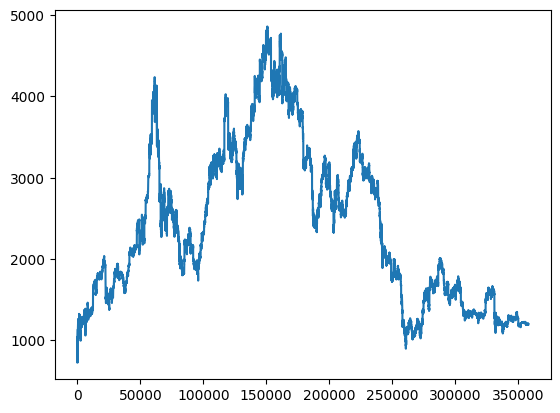

In [71]:
import pandas as pd

import matplotlib.pyplot as plt

df_merged['high'].plot()
plt.show()

In [121]:
df_merged.head(5)

,high,Dates,Time,Author,Created UTC,Domain,URL,Title,Num Comments,Score,...,datetime,date,price_5,neg,neu,pos,compound,label,title_count,week_day
0,730.03,2021-01-02,05:00:00,FrequentMushroom,2021-01-02 05:00:54,self.ethereum,https://www.reddit.com/r/ethereum/comments/kor...,ethereum continues rise dont gas fees,6.0,0.0,...,2021-01-02 05:00:54,2021-01-02,731.96,0.0,1.000,0.000,0.0000,neu,6,Saturday
1,732.16,2021-01-02,05:37:00,emperor-penguin-,2021-01-02 05:37:03,self.ethereum,https://www.reddit.com/r/ethereum/comments/kor...,successful guides ethereum mining,3.0,0.0,...,2021-01-02 05:37:03,2021-01-02,732.59,0.0,0.568,0.432,0.5859,pos,4,Saturday
2,731.67,2021-01-02,06:03:00,k_dhokla,2021-01-02 06:03:26,self.ethereum,https://www.reddit.com/r/ethereum/comments/kos...,5 rinkeby test ether learning purpose,0.0,1.0,...,2021-01-02 06:03:26,2021-01-02,732.31,0.0,1.000,0.000,0.0000,neu,6,Saturday
3,732.03,2021-01-02,06:25:00,dak9000,2021-01-02 06:25:20,self.ethereum,https://www.reddit.com/r/ethereum/comments/kos...,erc20 token adoption impact ethereum,2.0,1.0,...,2021-01-02 06:25:20,2021-01-02,732.73,0.0,1.000,0.000,0.0000,neu,5,Saturday
4,731.95,2021-01-02,06:26:00,another_lease,2021-01-02 06:26:09,self.ethereum,https://www.reddit.com/r/ethereum/comments/kos...,smart contract sell domain name via escrow,1.0,5.0,...,2021-01-02 06:26:09,2021-01-02,739.71,0.0,0.722,0.278,0.4019,pos,7,Saturday


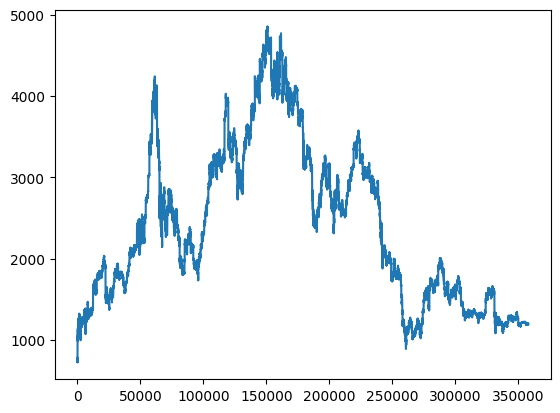

In [122]:
import pandas as pd

import matplotlib.pyplot as plt

df_merged['price_5'].plot()
plt.show()

<Axes: title={'center': 'Points Scored by Team'}, ylabel='high'>

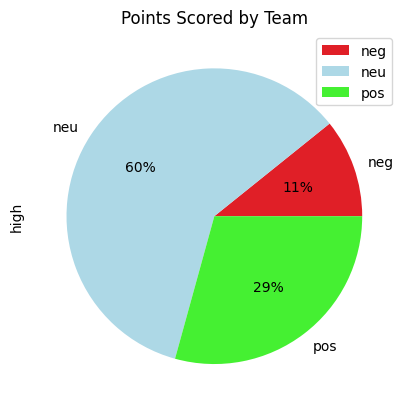

In [123]:
df_merged.groupby(['label']).sum().plot(kind='pie', y='high', autopct='%1.0f%%',
                                colors = ['#e01f27', 'lightblue', '#45f032'],
                                title='Points Scored by Team')

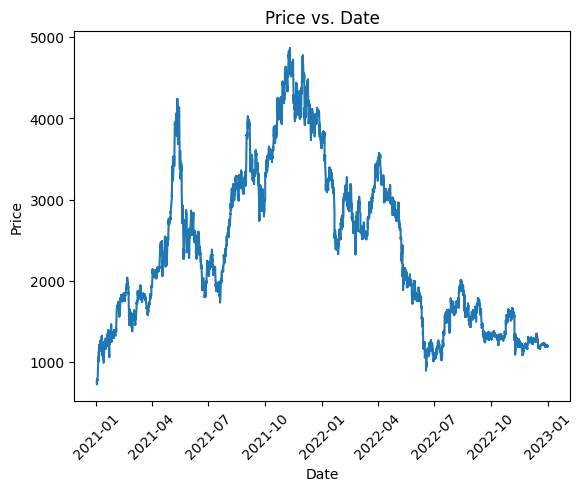

In [75]:
df_merged['date'] = pd.to_datetime(df_merged['date'])

# Plot the price column against the date column
plt.plot(df_merged['date'], df_merged['high'])

# Set the axis labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price vs. Date')

plt.xticks(rotation=45)
# Show the plot
plt.show()

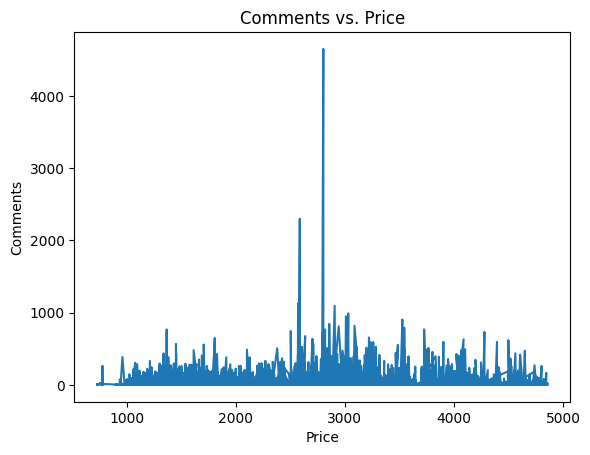

In [76]:


# Plot the price column against the date column
plt.plot(df_merged['high'],df_merged['Num Comments'])

# Set the axis labels and title
plt.xlabel('Price')
plt.ylabel('Comments')
plt.title('Comments vs. Price')

# plt.xticks(rotation=45)
# Show the plot
plt.show()

In [77]:
df_merged.columns

Index(['Unnamed: 0', 'high', 'Dates', 'Time', 'Author', 'Created UTC',
       'Domain', 'URL', 'Title', 'Num Comments', 'Score', 'Upvote Ratio',
       'datetime', 'date', 'price_5', 'neg', 'neu', 'pos', 'compound',
       'label'],
      dtype='object')

In [78]:
if "Unnamed: 0" in df_merged.columns:
  df_merged.drop(['Unnamed: 0'], axis=1, inplace=True)

In [79]:
df_merged.head(5)

,high,Dates,Time,Author,Created UTC,Domain,URL,Title,Num Comments,Score,Upvote Ratio,datetime,date,price_5,neg,neu,pos,compound,label
0,730.03,2021-01-02,05:00:00,FrequentMushroom,2021-01-02 05:00:54,self.ethereum,https://www.reddit.com/r/ethereum/comments/kor...,If Ethereum continues to rise dont GAS fees too?,6,0,0.33,2021-01-02 05:00:54,2021-01-02,731.96,0.0,1.000,0.000,0.0000,neu
1,732.16,2021-01-02,05:37:00,emperor-penguin-,2021-01-02 05:37:03,self.ethereum,https://www.reddit.com/r/ethereum/comments/kor...,Any successful guides for Ethereum mining?,3,0,0.44,2021-01-02 05:37:03,2021-01-02,732.59,0.0,0.568,0.432,0.5859,pos
2,731.67,2021-01-02,06:03:00,k_dhokla,2021-01-02 06:03:26,self.ethereum,https://www.reddit.com/r/ethereum/comments/kos...,5 Rinkeby Test Ether (For Learning Purpose Only),0,1,1.00,2021-01-02 06:03:26,2021-01-02,732.31,0.0,1.000,0.000,0.0000,neu
3,732.03,2021-01-02,06:25:00,dak9000,2021-01-02 06:25:20,self.ethereum,https://www.reddit.com/r/ethereum/comments/kos...,How does ERC-20 token adoption impact Ethereum?,2,1,1.00,2021-01-02 06:25:20,2021-01-02,732.73,0.0,1.000,0.000,0.0000,neu
4,731.95,2021-01-02,06:26:00,another_lease,2021-01-02 06:26:09,self.ethereum,https://www.reddit.com/r/ethereum/comments/kos...,Smart Contract to sell a domain name via escrow,1,5,0.86,2021-01-02 06:26:09,2021-01-02,739.71,0.0,0.722,0.278,0.4019,pos


In [80]:
df_merged.dtypes

high                   float64
Dates                   object
Time                    object
Author                  object
Created UTC             object
Domain                  object
URL                     object
Title                   object
Num Comments             int64
Score                    int64
Upvote Ratio           float64
datetime                object
date            datetime64[ns]
price_5                float64
neg                    float64
neu                    float64
pos                    float64
compound               float64
label                   object
dtype: object

  Using cached pandas_profiling-3.6.6-py2.py3-none-any.whl (324 kB)


ImportError: ignored

In [81]:
df_merged = df_merged.dropna()

In [82]:
import re
df_merged['Title'] = df_merged['Title'].apply(lambda x: re.sub('[^A-Za-z0-9 ]+', '', x))

In [83]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

for i in range(len(df_merged)):
    title = df_merged.iloc[i]['Title']
    words = word_tokenize(title.lower())
    words = [w for w in words if not w in stop_words]
    df_merged.at[i, 'Title'] = ' '.join(words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [84]:
df_merged["title_count"] = df_merged["Title"].apply(lambda n: len(n.split()))

In [85]:
df_merged.head(5)

,high,Dates,Time,Author,Created UTC,Domain,URL,Title,Num Comments,Score,Upvote Ratio,datetime,date,price_5,neg,neu,pos,compound,label,title_count
0,730.03,2021-01-02,05:00:00,FrequentMushroom,2021-01-02 05:00:54,self.ethereum,https://www.reddit.com/r/ethereum/comments/kor...,ethereum continues rise dont gas fees,6.0,0.0,0.33,2021-01-02 05:00:54,2021-01-02,731.96,0.0,1.000,0.000,0.0000,neu,6
1,732.16,2021-01-02,05:37:00,emperor-penguin-,2021-01-02 05:37:03,self.ethereum,https://www.reddit.com/r/ethereum/comments/kor...,successful guides ethereum mining,3.0,0.0,0.44,2021-01-02 05:37:03,2021-01-02,732.59,0.0,0.568,0.432,0.5859,pos,4
2,731.67,2021-01-02,06:03:00,k_dhokla,2021-01-02 06:03:26,self.ethereum,https://www.reddit.com/r/ethereum/comments/kos...,5 rinkeby test ether learning purpose,0.0,1.0,1.00,2021-01-02 06:03:26,2021-01-02,732.31,0.0,1.000,0.000,0.0000,neu,6
3,732.03,2021-01-02,06:25:00,dak9000,2021-01-02 06:25:20,self.ethereum,https://www.reddit.com/r/ethereum/comments/kos...,erc20 token adoption impact ethereum,2.0,1.0,1.00,2021-01-02 06:25:20,2021-01-02,732.73,0.0,1.000,0.000,0.0000,neu,5
4,731.95,2021-01-02,06:26:00,another_lease,2021-01-02 06:26:09,self.ethereum,https://www.reddit.com/r/ethereum/comments/kos...,smart contract sell domain name via escrow,1.0,5.0,0.86,2021-01-02 06:26:09,2021-01-02,739.71,0.0,0.722,0.278,0.4019,pos,7


In [86]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357713 entries, 0 to 349487
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   high          349713 non-null  float64       
 1   Dates         349713 non-null  object        
 2   Time          349713 non-null  object        
 3   Author        349713 non-null  object        
 4   Created UTC   349713 non-null  object        
 5   Domain        349713 non-null  object        
 6   URL           349713 non-null  object        
 7   Title         357713 non-null  object        
 8   Num Comments  349713 non-null  float64       
 9   Score         349713 non-null  float64       
 10  Upvote Ratio  349713 non-null  float64       
 11  datetime      349713 non-null  object        
 12  date          349713 non-null  datetime64[ns]
 13  price_5       349713 non-null  float64       
 14  neg           349713 non-null  float64       
 15  neu           349

In [87]:
df_merged['datetime'] = pd.to_datetime(df_merged['datetime'])

df_merged['week_day'] = df_merged['datetime'].dt.day_name()

In [88]:
df_merged.head(5)

,high,Dates,Time,Author,Created UTC,Domain,URL,Title,Num Comments,Score,...,datetime,date,price_5,neg,neu,pos,compound,label,title_count,week_day
0,730.03,2021-01-02,05:00:00,FrequentMushroom,2021-01-02 05:00:54,self.ethereum,https://www.reddit.com/r/ethereum/comments/kor...,ethereum continues rise dont gas fees,6.0,0.0,...,2021-01-02 05:00:54,2021-01-02,731.96,0.0,1.000,0.000,0.0000,neu,6,Saturday
1,732.16,2021-01-02,05:37:00,emperor-penguin-,2021-01-02 05:37:03,self.ethereum,https://www.reddit.com/r/ethereum/comments/kor...,successful guides ethereum mining,3.0,0.0,...,2021-01-02 05:37:03,2021-01-02,732.59,0.0,0.568,0.432,0.5859,pos,4,Saturday
2,731.67,2021-01-02,06:03:00,k_dhokla,2021-01-02 06:03:26,self.ethereum,https://www.reddit.com/r/ethereum/comments/kos...,5 rinkeby test ether learning purpose,0.0,1.0,...,2021-01-02 06:03:26,2021-01-02,732.31,0.0,1.000,0.000,0.0000,neu,6,Saturday
3,732.03,2021-01-02,06:25:00,dak9000,2021-01-02 06:25:20,self.ethereum,https://www.reddit.com/r/ethereum/comments/kos...,erc20 token adoption impact ethereum,2.0,1.0,...,2021-01-02 06:25:20,2021-01-02,732.73,0.0,1.000,0.000,0.0000,neu,5,Saturday
4,731.95,2021-01-02,06:26:00,another_lease,2021-01-02 06:26:09,self.ethereum,https://www.reddit.com/r/ethereum/comments/kos...,smart contract sell domain name via escrow,1.0,5.0,...,2021-01-02 06:26:09,2021-01-02,739.71,0.0,0.722,0.278,0.4019,pos,7,Saturday


In [ ]:
df_merged['week_day'].unique()

array(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday', nan], dtype=object)

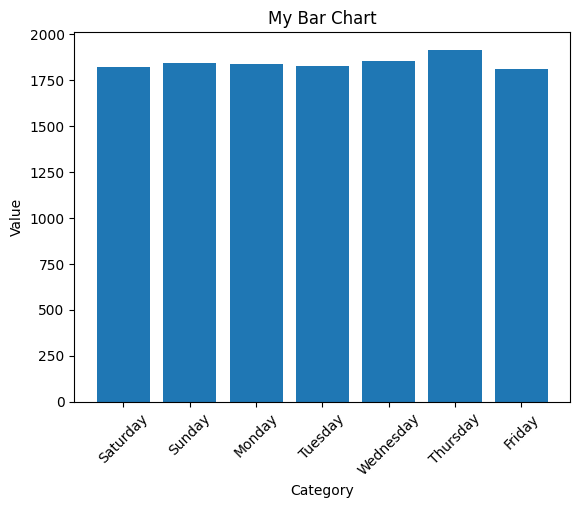

In [ ]:
import matplotlib.pyplot as plt
df_merged['week_day'] = df_merged['week_day'].astype(str)
plt.bar(df_merged['week_day'], df_merged['high'])

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Value')
plt.title('My Bar Chart')
plt.xticks(rotation=45)

# Show the chart
plt.show()

In [ ]:
stop_words = stopwords.words('english')

In [ ]:
def custom_tokenize(text):
  # remove single quote and dashes
  text = text.replace("'", "").replace("-", "").lower()

  # split on words only
  tk = nltk.tokenize.RegexpTokenizer(r'\w+')
  tokens = tk.tokenize(text)

  # remove stop words
  words = [w for w in tokens if not w in stop_words]
  return words

In [ ]:

def tokens_title(df, label):
  # subset titles based on label
  titles = df[df['label'] == label].Title
  # apply our custom tokenize function to each title
  tokens = titles.apply(custom_tokenize)
  # join nested lists into a single list
  words = list(chain.from_iterable(tokens))
  return words

In [ ]:
pos_words = tokens_title(df_merged, 'pos')
neg_words = tokens_title(df_merged, 'neg')

In [ ]:
pos_freq = nltk.FreqDist(pos_words)
pos_freq.most_common(25)

[('ethereum', 1207),
 ('eth', 927),
 ('help', 584),
 ('crypto', 485),
 ('best', 355),
 ('please', 330),
 ('wallet', 325),
 ('like', 316),
 ('good', 302),
 ('smart', 263),
 ('free', 247),
 ('defi', 207),
 ('contract', 195),
 ('buy', 192),
 ('im', 192),
 ('new', 190),
 ('token', 189),
 ('bitcoin', 176),
 ('top', 161),
 ('time', 149),
 ('would', 147),
 ('price', 146),
 ('get', 143),
 ('one', 139),
 ('first', 138)]

In [ ]:
neg_freq = nltk.FreqDist(neg_words)
neg_freq.most_common(20)


[('ethereum', 556),
 ('eth', 511),
 ('gas', 202),
 ('crypto', 147),
 ('transaction', 146),
 ('scam', 139),
 ('fees', 100),
 ('help', 98),
 ('low', 93),
 ('20', 90),
 ('new', 87),
 ('price', 87),
 ('people', 83),
 ('buy', 82),
 ('wallet', 77),
 ('drop', 77),
 ('lost', 76),
 ('bitcoin', 75),
 ('block', 74),
 ('im', 72)]

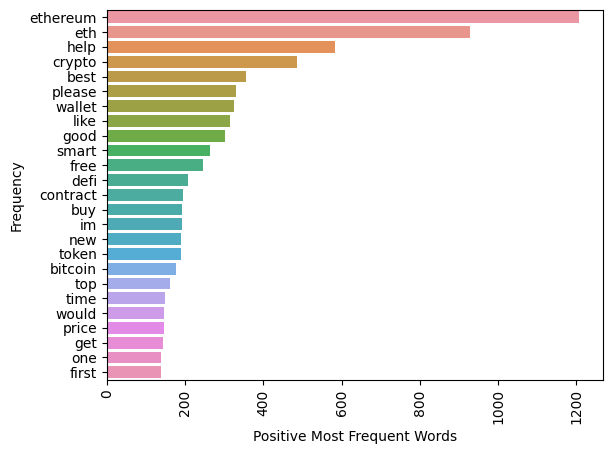

In [ ]:
import seaborn as sns
x_values = [item[0] for item in pos_freq.most_common(25)]
y_values = [item[1] for item in pos_freq.most_common(25)]

# Create bar plot
sns.barplot(x = y_values,y = x_values)


# Add title and labels to the plot

plt.xlabel("Positive Most Frequent Words")
plt.ylabel("Frequency")

plt.xticks(rotation=90)

# Show the plot
plt.show()

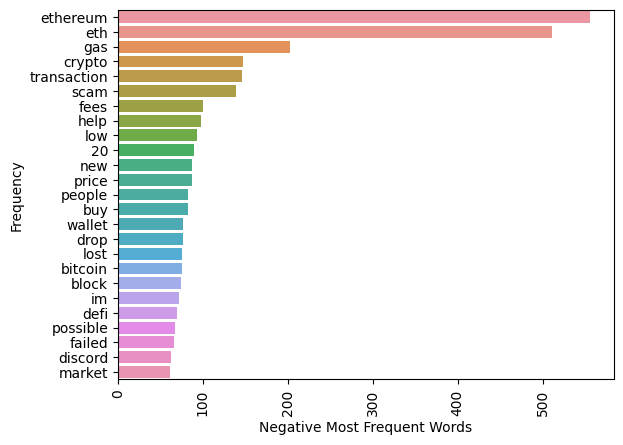

In [ ]:
import seaborn as sns
x_values = [item[0] for item in neg_freq.most_common(25)]
y_values = [item[1] for item in neg_freq.most_common(25)]

# Create bar plot
sns.barplot(x = y_values,y = x_values)


# Add title and labels to the plot
# plt.title("Bar Plot of Data")
plt.xlabel("Negative Most Frequent Words")
plt.ylabel("Frequency")

plt.xticks(rotation=90)

# Show the plot
plt.show()

In [ ]:
def title_output(df, label):
    res = df[df['label'] == label].Title.values
    print(f'{"=" * 20}')
    print("\n".join(title for title in res))

# randomly sample
df_sub = df_merged.groupby('label').sample(n = 5, random_state = 7)

print("Positive news")
title_output(df_sub, "pos")

print("\nNeutral news")
title_output(df_sub, "neu")

print("\nNegative news")
title_output(df_sub, "neg")

Positive news
surging ether cryptocurrency next best bet bitcoin
set fees ensure transactions complete
smart contract top yearn
highest value coins mined coins staked
eth2 hit 75k validators1m eoy

Neutral news
issue im
ethereum rise bitcoin amp need
new update btc eth new sentimente traders
need house send 1 eth
new reddit rethereum

Negative news
350 gas fee damn
wall street decided youre responsible enough buy gme need defi
im trouble mining
weewallet ethereum scam
ugh expensive coinbase horrid stg


In [ ]:
from wordcloud import WordCloud
def plot_word_cloud(words, colormap, stopwords = [], max_words = 100):
  text = " ".join(word for word in words)
  # generate word cloud
  wordcloud = WordCloud(width=1000, height = 600,
                        max_words = max_words,
                        colormap=colormap,
                        stopwords = stopwords,
                        background_color="black").generate(text)

  # Display the generated image:
  plt.figure( figsize=(20,10), facecolor='k' )
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off");

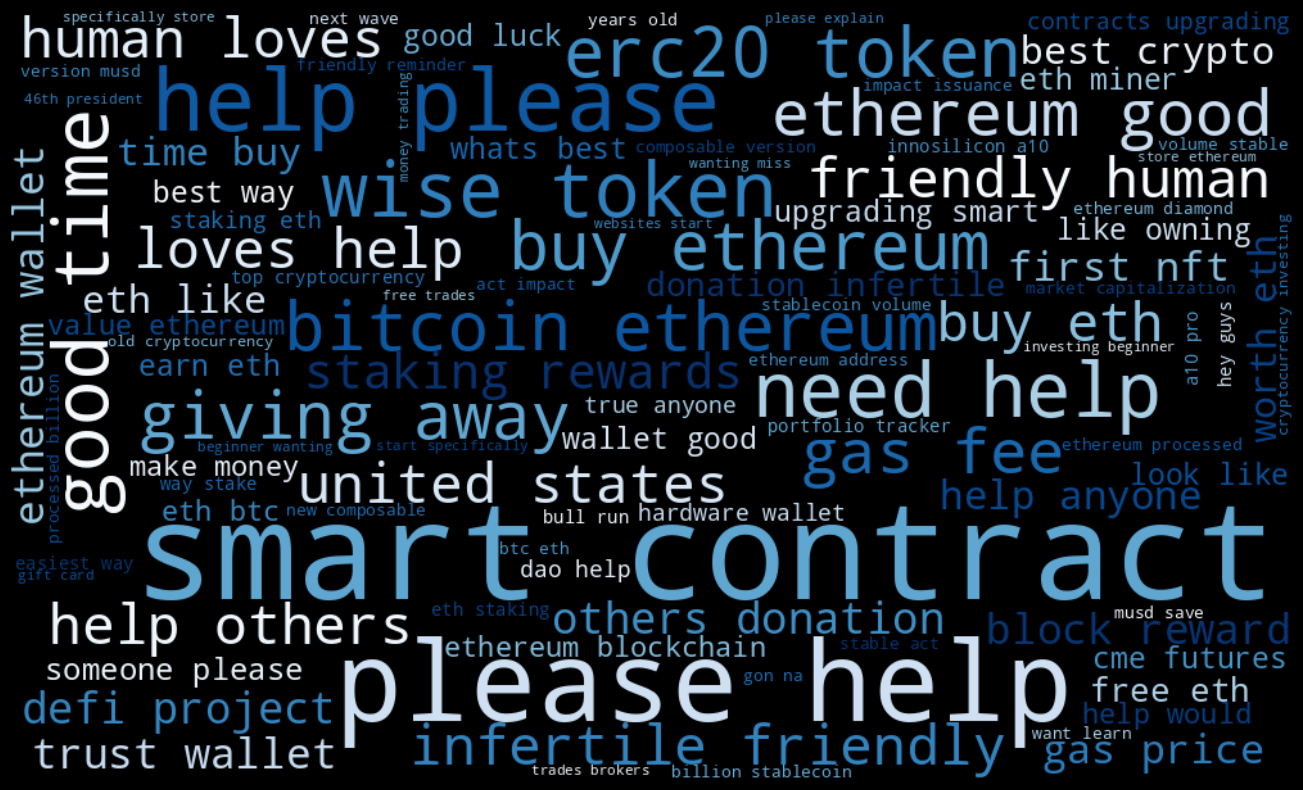

In [ ]:
import matplotlib.pyplot as plt

custom_stopwords = ["haha", "yes", "lmao", "felt"]
plot_word_cloud(pos_words, "Blues", custom_stopwords)

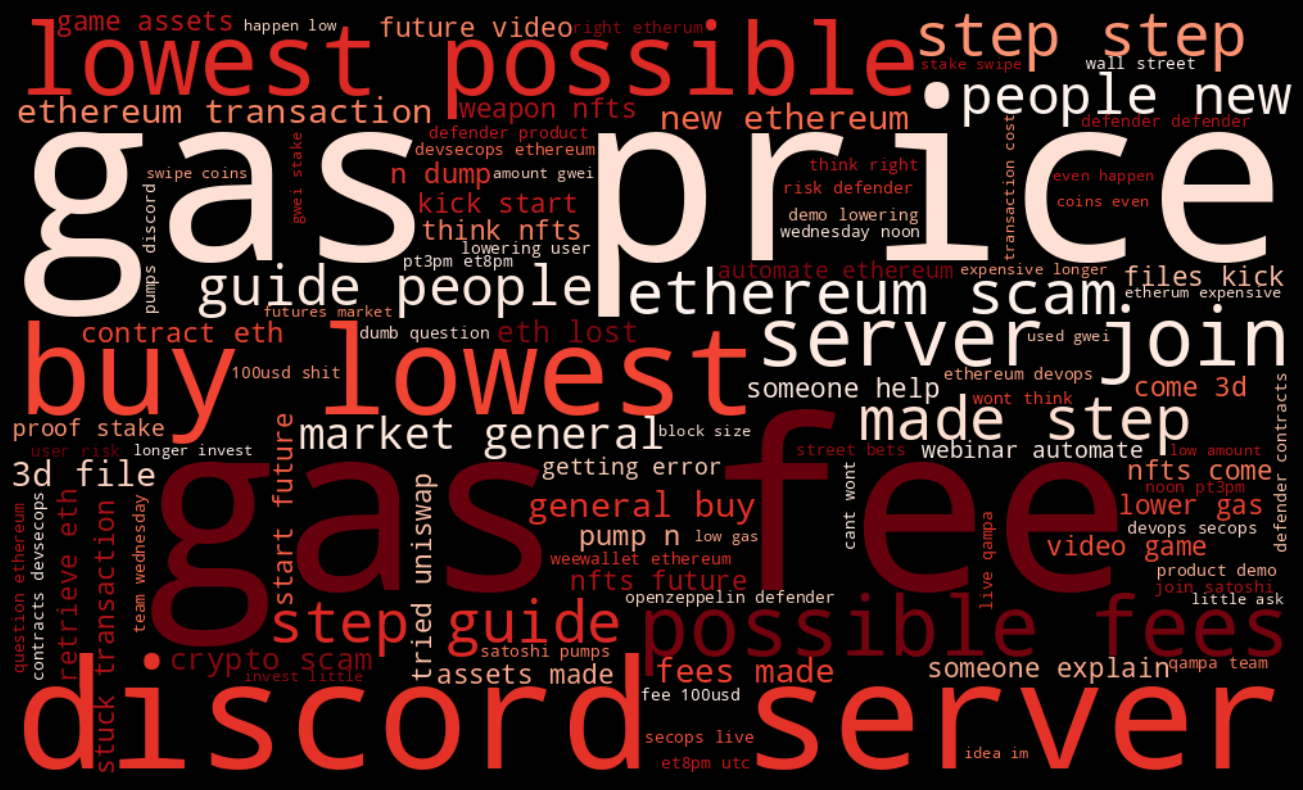

In [ ]:
custom_stopwords = ["said","hey","know","need","youre"]
plot_word_cloud(neg_words, "Reds", custom_stopwords)

In [ ]:
df_merged.columns

Index(['high', 'Dates', 'Time', 'Author', 'Created UTC', 'Domain', 'URL',
       'Title', 'Num Comments', 'Score', 'Upvote Ratio', 'datetime', 'date',
       'price_5', 'neg', 'neu', 'pos', 'compound', 'label', 'title_count',
       'week_day'],
      dtype='object')

In [ ]:
df_merged.drop(['label','Dates','Author','Time','week_day','Created UTC','datetime','Domain',"Title",'URL','date'], axis=1, inplace=True)

In [ ]:
df_merged.rename(columns={'high': 'price'}, inplace=True)

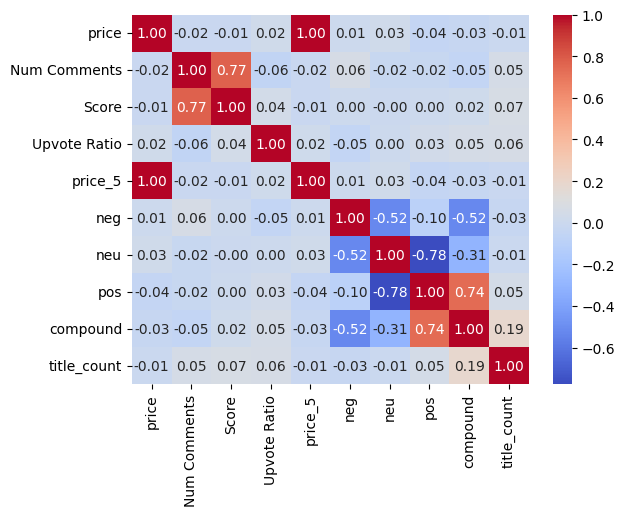

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df_merged.corr(), cmap='coolwarm', annot=True,fmt='.2f')
plt.show()


In [ ]:
df_merged.to_csv("processed.csv")

In [ ]:
df_model = pd.read_csv("processed.csv")

In [ ]:
df_model.head()

,Unnamed: 0,price,Num Comments,Score,Upvote Ratio,price_5,neg,neu,pos,compound,title_count
0,0,730.03,6.0,0.0,0.33,731.96,0.0,1.000,0.000,0.0000,6
1,1,732.16,3.0,0.0,0.44,732.59,0.0,0.568,0.432,0.5859,4
2,2,731.67,0.0,1.0,1.00,732.31,0.0,1.000,0.000,0.0000,6
3,3,732.03,2.0,1.0,1.00,732.73,0.0,1.000,0.000,0.0000,5
4,4,731.95,1.0,5.0,0.86,739.71,0.0,0.722,0.278,0.4019,7


In [ ]:
if "Unnamed: 0" in df_model.columns:
  df_model.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df_model = df_model.dropna()

In [ ]:
df_model.describe()

,price,Num Comments,Score,Upvote Ratio,price_5,neg,neu,pos,compound,title_count
count,19917.000000,19917.000000,19917.000000,19917.000000,19917.000000,19917.000000,19917.000000,19917.000000,19917.000000,19917.000000
mean,1447.921405,6.082844,17.329919,0.891961,1447.284624,0.045693,0.854622,0.097927,0.087645,6.122508
std,250.883188,25.343193,115.033624,0.179726,251.250652,0.124111,0.205436,0.172140,0.301984,4.546633
min,726.280000,0.000000,0.000000,0.100000,725.522140,0.000000,0.000000,0.000000,-0.854100,0.000000
25%,1245.000000,0.000000,1.000000,0.820000,1245.510281,0.000000,0.737000,0.000000,0.000000,3.000000
50%,1351.300000,0.000000,1.000000,1.000000,1351.100000,0.000000,1.000000,0.000000,0.000000,5.000000
75%,1712.100000,3.000000,3.000000,1.000000,1712.900000,0.000000,1.000000,0.169000,0.250000,8.000000
max,1914.200000,473.000000,2604.000000,1.000000,1919.000000,1.000000,1.000000,1.000000,0.975800,36.000000


In [ ]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19917 entries, 0 to 19916
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         19917 non-null  float64
 1   Num Comments  19917 non-null  float64
 2   Score         19917 non-null  float64
 3   Upvote Ratio  19917 non-null  float64
 4   price_5       19917 non-null  float64
 5   neg           19917 non-null  float64
 6   neu           19917 non-null  float64
 7   pos           19917 non-null  float64
 8   compound      19917 non-null  float64
 9   title_count   19917 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.7 MB


In [ ]:
X = df_model.drop('price', axis=1)
y = df_model['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# fit model no training data
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

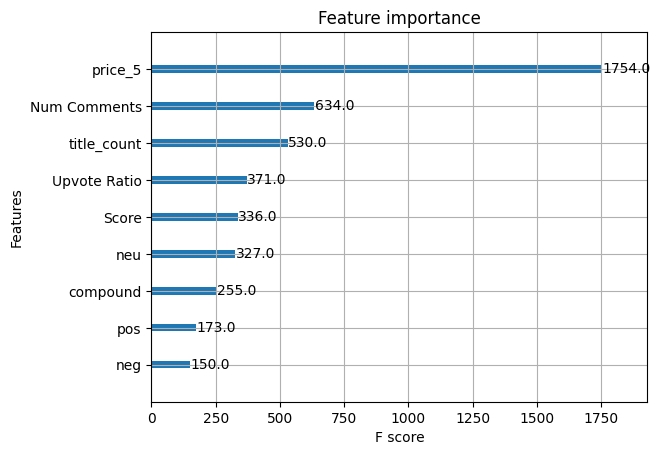

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance
plot_importance(model)
plt.show()

In [ ]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print("mse",mse)
print("r2",r2-0.20)

mse 114.24310428375911
r2 0.7981658356122463


In [ ]:
params = { 'max_depth': [3,6,10,15],
           'learning_rate': [0.01, 0.05, 0.1,0.2],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}


In [ ]:
xgbr = XGBRegressor(seed = 20)

In [ ]:
clf = GridSearchCV(estimator=xgbr,
                   param_grid=params,
                   scoring='neg_mean_squared_error',
                   verbose=1)

In [ ]:
clf.fit(X_train, y_train)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))


Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 1000}
Lowest RMSE:  9.462916543069118


In [ ]:
predict_y = clf.predict(X_test)
mse = mean_squared_error(y_test, predict_y)
r2 = r2_score(y_test, predict_y)
print("mse",mse)
print("r2",r2)

mse 74.02741733624498
r2 0.9988114954206928


In [ ]:
base_models = [ExtraTreesRegressor(n_estimators= 5,
                          criterion= 'squared_error',
                          max_features = 'log2',
                          random_state = 40),
               RandomForestRegressor(n_estimators= 5,
                               criterion= 'squared_error',
                               max_features = 'sqrt',
                               min_samples_split = 3,
                               random_state = 40)]


In [ ]:
tuned_parameters = {    'base_estimator':base_models,
                        'loss' : ['exponential']
                        ,'random_state' : [47]
                        ,'learning_rate' : [1]
                         }

clf1 = GridSearchCV(AdaBoostRegressor(), tuned_parameters, cv=4)
clf1.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=AdaBoostRegressor(),
             param_grid={'base_estimator': [ExtraTreesRegressor(max_features='log2',
                                                                n_estimators=5,
                                                                random_state=40),
                                            RandomForestRegressor(max_features='sqrt',
                                                                  min_samples_split=3,
                                                                  n_estimators=5,
                                                                  random_state=40)],
                         'learning_rate': [1], 'loss': ['exponential'],
                         'random_state': [47]})

In [ ]:
predict_y = clf1.predict(X_test)
mse = mean_squared_error(y_test, predict_y)
r2 = r2_score(y_test, predict_y)
print("mse",mse)
print("r2",r2)

mse 22.823553937406846
r2 0.9996335695699411
